In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.stats import maxwell

In [2]:
def get_velocity(w, mu_asc, mu_dec):
    '''
    Compute the tangential velocity using the Proper Motion Formula from 
    https://www.astronomy.ohio-state.edu/pogge.1/Ast162/Unit1/motions.html
    
    Parameters:
        w:         observed parallax distance [mas]
        mu_asc:    observed proper motion (Right Ascension) [mas/yr]
        mu_dec:    observed proper motion (Declination) [mas/yr]
    
    Return: 
        v_perp:    tangential velocity [km/s]
    '''
    
    w = w*u.mas.to(u.arcsec) # [arcsec]
    D = 1/w # [pc]    

    mu_asc = mu_asc*(u.mas/u.yr).to(u.arcsec/u.yr) # [arcsec/yr]
    mu_dec = mu_dec*(u.mas/u.yr).to(u.arcsec/u.yr) # [arcsec/yr]

    corr_factor = 4.74 #from formula in reference above
    
    v_asc = corr_factor*mu_asc*D # [km/s]
    v_dec = corr_factor*mu_dec*D # [km/s]
    
        
    v_perp = np.sqrt(v_asc**2 + v_dec**2)
    
    return v_perp

In [3]:
fname = 'pulsar_data_verbunt17.txt'

# Data: parallax [mas]    mu_asc [mas/yr]    mu_dec [mas/yr]
pulsar_data = np.loadtxt(fname, skiprows=2, usecols=(4,6,8))


In [4]:
w = pulsar_data[:,0]
mu_asc = pulsar_data[:,1]
mu_dec = pulsar_data[:,2]

In [5]:
pulsar_v = get_velocity(w, mu_asc, mu_dec) #[km/s]

In [6]:
x = np.linspace(0, 1000, 100)
m1 = maxwell.cdf(x, 0, 75)
m2 = maxwell.cdf(x, 0, 316)

# r1 = m1.rvs(size=420)
# r2 = m2.rvs(size=580)

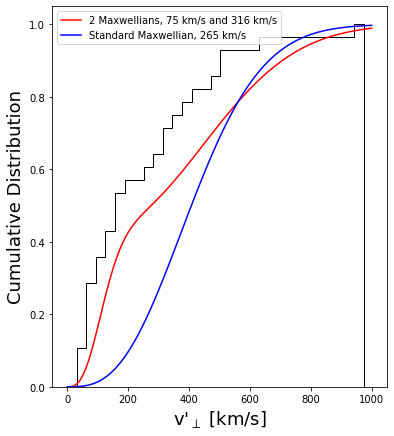

In [9]:
f = 0.42

fig, axes = plt.subplots(1,1, figsize=(6,7))

plt.hist(pulsar_v, histtype='step', color='k', cumulative=True, density=True, bins=30)

plt.plot(x, f*m1+ (1-f)*m2, label='2 Maxwellians, 75 km/s and 316 km/s', color='r')
plt.plot(x, maxwell.cdf(x, 0, 265), color='b', label='Standard Maxwellian, 265 km/s')

plt.xlabel('v\'$_\perp$ [km/s]', fontsize=18)
plt.ylabel('Cumulative Distribution', fontsize=18)

plt.legend()
plt.show()